# **Import required libraries**

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# **Reads .csv file**

In [17]:
dataset = pd.read_csv("/content/Breast Cancer.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**1.** Splits the data in to x and y

**2.** Transforms y data by labelEncoder as it is a categorical data

**3.** Splits data into train and test

In [18]:
X = dataset.iloc[:,2:32].values
y = dataset.iloc[:,1].values

# Trnasform y data by labelEncoder as it is a categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Test and train data split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# **Print shape of X_train, y_train,X_test and y_test**

In [19]:
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)



X_train.shape:  (426, 30)
Y_train.shape:  (426,)
X_test.shape:  (143, 30)
Y_test.shape:  (143,)


# **Apply existing model provided in the usecase**

In [20]:
model_1 = Sequential() # create a Sequential model

model_1.add(Dense(32, input_dim=30, activation='relu')) # hidden layer
model_1.add(Dense(1, activation='sigmoid')) # output layer (WHY 'sigmoid function!!!')

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# The returned history object holds a record of the loss values and metric values during training
history =  model_1_fitted = model_1.fit(X_train, Y_train, epochs=200, verbose=1, shuffle=True)



Epoch 1/200
14/14 [==============================] - 0s 1ms/step - loss: 4.0859 - acc: 0.6972
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 2.2697 - acc: 0.7700
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 1.7730 - acc: 0.7559
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 1.7771 - acc: 0.8005
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 1.5497 - acc: 0.8498
Epoch 6/200
14/14 [==============================] - 0s 1ms/step - loss: 1.3450 - acc: 0.8521
Epoch 7/200
14/14 [==============================] - 0s 1ms/step - loss: 1.2393 - acc: 0.8521
Epoch 8/200
14/14 [==============================] - 0s 1ms/step - loss: 1.1319 - acc: 0.8568
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 1.1504 - acc: 0.8521
Epoch 10/200
14/14 [==============================] - 0s 1ms/step - loss: 1.0972 - acc: 0.8592
Epoch 11/200
14/14 [==============================] - 0s 1m

# **Accuracy of the model 1**

1. Prints the model summary
2. evaluate loss and accuracy using test data

In [21]:
print(model_1.summary())

loss, accuracy = model_1.evaluate(X_test, Y_test, verbose=0)

print("\nModel 1 Accuracy: ", accuracy)
print("Model 1 Loss: ", loss)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________
None

Model 1 Accuracy:  0.9370629191398621
Model 1 Loss:  0.140098437666893


# **Add more Dense layers to the existing code and check accuracy**



*   Here I have added extra dense with 64 units and Relu as 
activation.

In [22]:
model_2 = Sequential() # create a Sequential model

model_2.add(Dense(32, input_dim=30, activation='relu')) # hidden layer

# Add more Dense layers to the existing code
model_2.add(Dense(64, activation='relu')) 

model_2.add(Dense(1, activation='sigmoid')) # output layer 

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# **Add the validation_data=(X_test, Y_test) attribute to .fit() method**

In [23]:
# Add the validation_data=(X_test, Y_test) attribute to .fit() method
history = model_2_fitted = model_2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, verbose=1, shuffle=True)

Epoch 1/200
14/14 [==============================] - 1s 14ms/step - loss: 16.9642 - acc: 0.4249 - val_loss: 2.7844 - val_acc: 0.3497
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 3.7174 - acc: 0.4390 - val_loss: 2.3617 - val_acc: 0.5944
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 1.5606 - acc: 0.5869 - val_loss: 1.0797 - val_acc: 0.4336
Epoch 4/200
14/14 [==============================] - 0s 4ms/step - loss: 0.7493 - acc: 0.7512 - val_loss: 0.5359 - val_acc: 0.7902
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 0.5501 - acc: 0.8286 - val_loss: 0.4857 - val_acc: 0.8881
Epoch 6/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4403 - acc: 0.8662 - val_loss: 0.3919 - val_acc: 0.8951
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4242 - acc: 0.8310 - val_loss: 0.4225 - val_acc: 0.7692
Epoch 8/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3703 -

# **Accuracy of the dense model 2**

In [24]:
print(model_2.summary())

loss, accuracy = model_2.evaluate(X_test, Y_test, verbose=0)

print("\nModel 2 Accuracy with added dense layers: ", accuracy)
print("Model 2 Loss with added dense layers: ", loss)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________
None

Model 2 Accuracy with added dense layers:  0.9160839319229126
Model 2 Loss with added dense layers:  0.17141962051391602


# **Plot the accuracy for training and validation in the same plot**

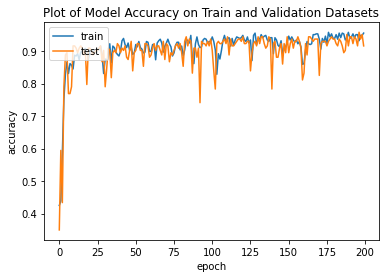

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Plot of Model Accuracy on Train and Validation Datasets')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Normalize the data before feeding the data to the model**

In [26]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=22)

In [27]:
# The returned history object holds a record of the loss values and metric values during training
model_2_fitted = model_2.fit(X_train, Y_train, epochs=200, verbose=1, shuffle=True)

Epoch 1/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4374 - acc: 0.8451
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 0.2257 - acc: 0.9061
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 0.1166 - acc: 0.9554
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0717 - acc: 0.9718
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0514 - acc: 0.9859
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0418 - acc: 0.9883
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0386 - acc: 0.9930
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0308 - acc: 0.9953
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0294 - acc: 0.9930
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0244 - acc: 0.9977
Epoch 11/200
14/14 [==============================] - 0s 2m

# **Accuracy of the model 2 with normalized data**

In [28]:
loss, accuracy = model_2.evaluate(X_test, Y_test, verbose=0)

print("\nModel_2 Accuracy after data normalization: ", accuracy)
print("Model_2 Loss after data normalization: ", loss)


Model_2 Accuracy after data normalization:  0.9510489702224731
Model_2 Loss after data normalization:  0.6252762675285339


# **Summary**

IN the part 2 we used Breast Cancer dataset. First, we trained model using 32 units of hidden dense layer neurons  and trained data, tested data and got accuracy of: 

**Model 1 Accuracy:  0.9370629191398621**

**Model 1 Loss:  0.140098437666893**

Second, Added more dense layer of 64 units, trained data. Tested data by passing vaidatation X_test and y-test and got accuracy of :

**Model 2 Accuracy with added dense layers:  0.9160839319229126**

**Model 2 Loss with added dense layers:  0.17141962051391602**

Accuracy got decreased after adding extra dense layer. Loss percentage increased.

Third, we normalized data using standardscalar() and tested on second model architecture and predicted test accuracy :

**Model_2 Accuracy after data normalization:  0.9510489702224731**

**Model_2 Loss after data normalization:  0.6252762675285339**

After normalizing data accuracy agin got increased for model_2 (in this model we added extra layer of dence)
